# FIT5196 Assessment 1: 
# Task 2: Text Pre Processing
#### Student Name: Prashantkumar P Kulkarni
#### Student ID: 29470811
##### Date:02-09-2018

##### Environment: Python 3.6 and Jupyter notebook
##### Libraries used: 
##### 1) re - Regular expression
##### 2) nltk - Natural Language Toolkit


#### Importing packages

In [303]:
import re
import nltk
import nltk.probability
from nltk import RegexpTokenizer
from nltk.util import ngrams
from nltk import FreqDist
from nltk import PorterStemmer
from __future__ import division
from itertools import chain
import matplotlib as plot

#### Reading resumes dataset list and stopword  file
Kindly find '29470811-resume.txt' file in the zip folder which is extracted from resume_student_datase.txt for student id 29470811 

In [304]:
file_input1 = []
for each in file_input:
    if(len(each)>0):
        file_input1.append(each)
len(file_input1)
file = '29470811-resume.txt'
file_1 = open(file,'r')
file_3 = file_1.read()
file_1.close()
file_4 = file_3.split(',')

file = open('stopwords_en.txt','r')
file_words = file.read()
file.close()
file_stopword = file_words.split('\n')

#### Tokenizing sentences using PunktSentenceTokenizer

In [305]:
main_vocab = []
diction = {}
bigram_list = []
upper_case = []
lower_case = []
for each in file_4:
    file_name = 'resume_('+each+').txt'
    file_2 = open(file_name,'r',encoding="utf8")
    file = file_2.read()
    file_2.close()
    tokenizer = nltk.tokenize.punkt.PunktSentenceTokenizer()
    tok = tokenizer.tokenize(file)
    
    file_new = ''
    for each in tok:
        value = each.split(' ')
        value[0] = value[0].lower()
        for key in value:
            file_new = file_new +' ' + key
    tokenizer = RegexpTokenizer('\w+(?:[-'']\w+)?')
    token=tokenizer.tokenize(file_new)
    diction[file_name] = token
    
    

#### Creating a list of vocabulary
Once we have tokenised the resumes and created the dictionary of resumes and their respective tokens,
we will create a combined list of tokens which will be used further for creating vocabulary list.

In [306]:
for key in diction:
    for each in diction[key]:
        main_vocab.append(each)

#### Summary of the vocabulary
The number of unique tokens gives us the Vocabulary size, the total number of tokens present in the Vocabulary list, Lexical diversity tells us the ratio of total number of words to the unique words.

In [307]:
words = main_vocab
vocab = set(words)
lexical_diversity = len(words)/len(vocab)
print ("Vocabulary size: ",len(vocab),"\nTotal number of tokens: ", len(words), \
"\nLexical diversity: ", lexical_diversity)

Vocabulary size:  17656 
Total number of tokens:  154965 
Lexical diversity:  8.776903035795197


#### Finding the most repeating tokens
By plotting the most frequent tokens, we can figure out the tokens which are not so useful but are repeating very frequently and try to remove them in further steps.

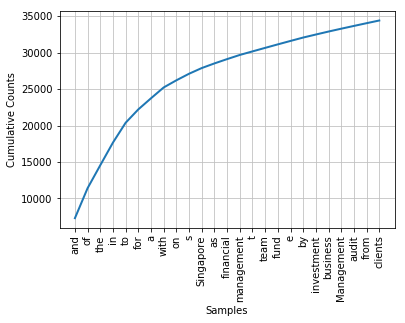

In [272]:
fd_1 = FreqDist(main_vocab)
fd_1.plot(25, cumulative=True)

#### Removing stopwords
Most common tokens which are frequently repeating in sentences and does not carry any or much of information regarding
that particular instance or sentence are stopwords. These tokens have to be removed and hence we remove the stopwords
from our vocabulary

In [273]:
new_vocab = []
for each in main_vocab:
    flag = 0
    for word in file_stopword:
        if(each == word and flag == 0):
            flag = 1
            break
    if(flag == 0):
        new_vocab.append(each)

Now that we have removed the stopwords, we will check if it has affected the vocabulary list by counting unique tokens,
lexical diversity

In [274]:
words = new_vocab
vocab = set(words)
lexical_diversity = len(words)/len(vocab)
print ("Vocabulary size: ",len(vocab),"\nTotal number of tokens: ", len(words), \
"\nLexical diversity: ", lexical_diversity)

Vocabulary size:  17299 
Total number of tokens:  114871 
Lexical diversity:  6.640326030406382


We see that the vocabulary size has reduced after removing the stopwords, reduction in the lexical diversity shows that many of the tokens were removed as they were stopwords.

#### Excluding the tokens of length less than two
Usually the tokens of length less than three doesnt give much information unless they are specifically used to 
represent something, hence we will exclude all the tokens with length less than three and keep the remaining tokens.

In [275]:
new_list = []
for each in new_vocab:
        if(len(each)>2):
            new_list.append(each)   

In [276]:
words = new_list
vocab = set(words)
lexical_diversity = len(words)/len(vocab)
print ("Vocabulary size: ",len(vocab),"\nTotal number of tokens: ", len(words), \
"\nLexical diversity: ", lexical_diversity)

Vocabulary size:  16568 
Total number of tokens:  106760 
Lexical diversity:  6.443746982134234


We can see the decrease in the vocabulary size after removing the tokens of length lesser than three.

#### Stemming
In english vocabulary there are many words which have a common root word for them, ex: meeting is derived from a root word 
'meet'. These words even though are different but they share similar information and hence we stem these words.

In [277]:
    vocabulary = []
    for each in new_list:
        if (each.islower()):
            stemmed_token =PorterStemmer().stem(each)
            vocabulary.append(stemmed_token)
        else:
            vocabulary.append(each)

#### Removing most frequent and least frequent words from the vocabulary

In the vocabulary list we will have the tokens which might have occured in almost all documents or which have occurred in
very few number of documents. The most frequent tokens share the same information and does not contribute much to the 
analysis. On the other hand there are few tokens which occur in very few documents and does not share enough information
about the context. We will set threshold for most frequent tokens to 98% and the least frequent tokens to 2%. Anything beyond these should be removed.


First we will find out all the words which are repeating in more than 98% and less than 2% of documents and then remove those words from the vocabulary created.
##### Note: It takes few minutes for next output since it will scan all the tokens in all the lists.

In [282]:
vocab1 = list(set(vocabulary))
remove_words = []
for each in vocab1:
    count = 0
    for key in diction:
        if(diction[key].count(each)>0):
            count = count + 1
    if((count/len(file_4))>=0.98 or (count/len(file_4))<=0.02):
        remove_words.append(each)

Now that we have identified the words to be removed, we will remove all such tokens which are present in our vocabulary.

In [285]:
final_vocab = []
remove_words = sorted(remove_word_list)
for each in vocabulary:
    flag = 0
    if(remove_words.count(each) == 0):
        final_vocab.append(each)

Now that we have removed the most frequent and the least frequent tokens, our vocabulary size has reduced drastically
and we observe that the lexical diversity has increased significantly.

In [286]:
words = final_vocab
vocab = set(words)
lexical_diversity = len(words)/len(vocab)
print ("Vocabulary size: ",len(vocab),"\nTotal number of tokens: ", len(words), \
"\nLexical diversity: ", lexical_diversity)

Vocabulary size:  1785 
Total number of tokens:  62727 
Lexical diversity:  35.141176470588235


#### Bigram List
Now that we have filtered out the data, we will convert the unigrams present in the vocabulary list to bigrams using ngrams
utility.

In [288]:
main_vocabulary = final_vocab
bigrams = ngrams(main_vocabulary, n = 2)
fdbigram = FreqDist(bigrams)
fdbigram.most_common()

[(('Hong', 'Kong'), 324),
 (('Pte', 'Ltd'), 91),
 (('Email', 'gmail'), 75),
 (('Microsoft', 'Office'), 67),
 (('English', 'Mandarin'), 60),
 (('Private', 'Equity'), 58),
 (('fund', 'fund'), 57),
 (('Business', 'Administration'), 55),
 (('team', 'member'), 54),
 (('cash', 'flow'), 53),
 (('Asset', 'Management'), 53),
 (('Real', 'Estate'), 53),
 (('intern', 'control'), 53),
 (('Asia', 'Pacific'), 50),
 (('University', 'Hong'), 47),
 (('fund', 'account'), 45),
 (('Bachelor', 'Business'), 43),
 (('WORK', 'EXPERIENCE'), 41),
 (('Fund', 'Accountant'), 40),
 (('Financial', 'Services'), 38),
 (('Fund', 'Services'), 38),
 (('Financial', 'Reporting'), 38),
 (('Proficient', 'Microsoft'), 37),
 (('2015', 'Present'), 37),
 (('Vice', 'President'), 36),
 (('Word', 'Excel'), 36),
 (('Ernst', 'Young'), 36),
 (('Fluent', 'English'), 35),
 (('Junior', 'College'), 33),
 (('2016', 'Present'), 33),
 (('Corporate', 'Finance'), 32),
 (('Risk', 'Management'), 32),
 (('Business', 'School'), 31),
 (('Senior', 'A

Collocations are the words which occur together frequently, we will find out the 200 most occuring bigrams in the 
documents using PMI bigram measures. PMI stands for Pointwise Mutual Information. Its statistical way of counting pair of outcomes in a discrete way quantifying the probability of the coincidence.

In [238]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_words(main_vocabulary)
finder_best = finder.nbest(bigram_measures.pmi, 200)

We have the collection of 200 bigrams, we will retokenize these bigrams so that we will have list of bigrams and unigrams
in our final vocabulary list.

In [289]:
from nltk.tokenize import MWETokenizer
tokenizer = MWETokenizer(finder_best)


We have the retokenized bigram list, now we will convert all possible unigrams in all the resume list and the 
final vocabulary list to Bigrams

In [290]:
for key in diction:
    diction[key]=tokenizer.tokenize(diction[key])

In [291]:
final_vocabulary = tokenizer.tokenize(main_vocabulary)

In [296]:
final_vocabulary = sorted(list(set(final_vocabulary)))

#### Indexing each token

In [297]:
indexed_vocabulary = {}
count = 0
for each in final_vocabulary:
    indexed_vocabulary[each] = count
    count = count + 1

#### Counting the number of tokens in each resumes and adding index, count to it

In [299]:
output_file = ''
for key in diction:
    output_file = output_file + key
    for each in indexed_vocabulary:
        if diction[key].count(each)>0:
            output_file = output_file + ','
            output_file = output_file + str(indexed_vocabulary[each]) +':' + str(diction[key].count(each)) 
    output_file = output_file + '\n'
with open ('29470811_countVec.txt','w') as f:
    f.write(output_file)

#### Generating output file for final vocabulary

In [302]:
final_tokens = ''
for value in final_vocabulary:
    final_tokens = final_tokens + value + ','
with open('29470811_vocab.txt','w') as p:
    p.write(final_tokens)